<a href="https://colab.research.google.com/github/tjdgns3481/DL_Keras/blob/main/Mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train,train_labels), (test, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train.shape)
print(train_labels.shape)
print(test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


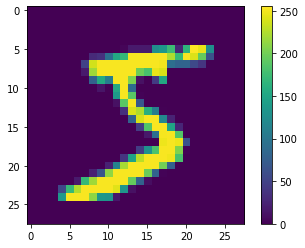

In [ ]:
plt.figure()
plt.imshow(train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train = train.reshape((60000, 28*28))
test = test.reshape((10000, 28*28))

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256,'relu',input_shape=(28*28,)))
model.add(layers.Dense(10,'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [ ]:
history = model.fit(x=train, y =train_labels, epochs =30, batch_size = 128, validation_split= 0.2)

Epoch 1/30
375/375 [==============================] - 3s 7ms/step - loss: 5.6853 - accuracy: 0.8805 - val_loss: 1.1894 - val_accuracy: 0.9334
Epoch 2/30
375/375 [==============================] - 3s 7ms/step - loss: 0.8994 - accuracy: 0.9419 - val_loss: 0.9264 - val_accuracy: 0.9347
Epoch 3/30
375/375 [==============================] - 2s 7ms/step - loss: 0.5335 - accuracy: 0.9570 - val_loss: 0.7345 - val_accuracy: 0.9556
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3918 - accuracy: 0.9664 - val_loss: 0.6703 - val_accuracy: 0.9572
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3225 - accuracy: 0.9715 - val_loss: 0.7254 - val_accuracy: 0.9609
Epoch 6/30
375/375 [==============================] - 2s 7ms/step - loss: 0.2659 - accuracy: 0.9756 - val_loss: 0.8073 - val_accuracy: 0.9596
Epoch 7/30
375/375 [==============================] - 3s 7ms/step - loss: 0.2183 - accuracy: 0.9795 - val_loss: 0.7512 - val_accuracy: 0.9624
Epoch 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

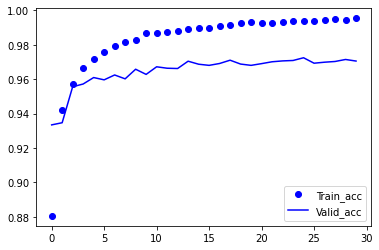

In [ ]:
epochs= range(len(acc))

plt.plot(epochs,acc,'bo',label='Train_acc')
plt.plot(epochs,val_acc,'b',label='Valid_acc')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc = model.evaluate(x=test, y=test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 1.1571 - accuracy: 0.9699


In [ ]:
predict = model.predict(test[0].reshape((1,28*28)))

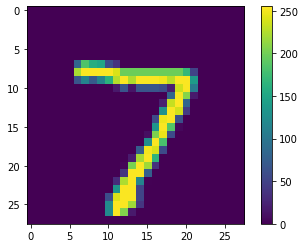

In [ ]:
plt.figure()
plt.imshow(test[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()